## Business Understanding

- I am a realestate agent at a realestate company that serves potential buyers and sellers in the King County Washington Area
- A potential environmentally friendly buyer, with a family of 5, came asking specifically to buy a waterfront property, with a view and no more than 4.5 million dollars
- As a realestate agent I am going to look into the buyers asks and try to get them the best possible house

## Importing the Data

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('./data/kc_house_data.csv')

## Data Understanding/Cleaning

In [3]:
# taking a look at the columns, nulls and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [4]:
# dropping null values, dropping id column, dropping duplicates and resetting dataframe index
df.dropna(inplace = True)
df.drop(columns = 'id', inplace = True)
df.drop_duplicates(inplace = True)
df.reset_index(drop = True, inplace = True)

Standardize all categorical columns to make sure that they are all lowercase and have no unnecessary spaces. I also need to change the date column from object to datetime.

In [5]:
# standardizing categorical columns and changing date column to datetime
cat_columns = ['waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 
               'grade', 'heat_source', 'sewer_system', 'address']
def standard(dataframe, column_to_clean):
    cleaned_df = dataframe.copy()
    
    for column in column_to_clean:
        if column in cleaned_df:
            cleaned_df[column] = cleaned_df[column].str.lower().str.strip()
    return cleaned_df

df = standard(df, cat_columns)
df['date'] = pd.to_datetime(df['date'])

In [6]:
# viewing unique values in some of the categorical columns
def unique_and_counts(dataframe, columns):
    df = dataframe.copy()
    
    for column in columns:
        if column in df:
            print(column.upper(), 'column unique values and counts:')
            print(df[column].value_counts())
    return
clmns_to_see = ['view', 'condition', 'grade', 'heat_source', 'sewer_system']
unique_and_counts(df, clmns_to_see)

VIEW column unique values and counts:
none         26552
average       1910
good           877
excellent      549
fair           220
Name: view, dtype: int64
CONDITION column unique values and counts:
average      18512
good          8052
very good     3258
fair           225
poor            61
Name: condition, dtype: int64
GRADE column unique values and counts:
7 average        11693
8 good            9398
9 better          3803
6 low average     2852
10 very good      1369
11 excellent       406
5 fair             385
12 luxury          122
4 low               46
13 mansion          24
3 poor               9
2 substandard        1
Name: grade, dtype: int64
HEAT_SOURCE column unique values and counts:
gas                  20575
electricity           6458
oil                   2899
gas/solar               93
electricity/solar       59
other                   20
oil/solar                4
Name: heat_source, dtype: int64
SEWER_SYSTEM column unique values and counts:
public               

In [7]:
# taking a look at the numerical columns
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.010800e+04,30108.000000,30108.000000,30108.000000,3.010800e+04,30108.000000,30108.000000,30108.000000,30108.000000,30108.000000,30108.000000,30108.000000,30108.000000,30108.000000
mean,1.108463e+06,3.415238,2.335642,2113.326857,1.665012e+04,1.543394,1810.402983,476.588548,330.491630,217.436064,1975.157931,90.801813,47.328884,-121.320528
std,8.947558e+05,0.979795,0.888285,973.461912,5.993586e+04,0.567688,877.745363,579.809205,285.724889,245.308714,32.051539,416.217375,1.432483,5.720625
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,6.490000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405383,-122.326083
50%,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551443,-122.225845
75%,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669916,-122.116399
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


Want to extract zipcode from the address column.

In [8]:
# creating a function to get zip codes from addresses and creating the zip_code column
def zip_code(address):
    x = address.split(' ')[-3]
    return x.split(',')[0]
df['zip_code'] = df['address'].apply(lambda x: zip_code(x))
df['zip_code'] = df['zip_code'].astype(int)

In [9]:
# looking at the number of unique zip codes
df['zip_code'].nunique()

399

Need to make sure that all the zip codes are in King County Washington. Went on to zillow and found all the appropriate zip codes.

In [10]:
# real king county zip codes and number of different zip codes
king_county_zips = [
    98052, 98105, 98092, 98115, 98023, 98103, 98003, 98042, 98034, 98133, 98118, 98125, 98031, 98058, 98122,
    98032, 98059, 98033, 98004, 98006, 98001, 98117, 98030, 98056, 98155, 98198, 98168, 98002, 98038, 98109, 
    98040, 98029, 98027, 98074, 98146, 98144, 98007, 98072, 98011, 98188, 98008, 98107, 98106, 98178, 98116,
    98075, 98108, 98112, 98028, 98119, 98055, 98053, 98126, 98199, 98177, 98022, 98102, 98166, 98005, 98121,
    98136, 98045, 98101, 98104, 98077, 98057, 98065, 98019, 98070, 98148, 98014, 98354, 98051, 98010, 98024,
    98047, 98151, 98251, 98134, 98039, 98158, 98195, 98288, 98174, 98132, 98171, 98184, 98054, 98224, 98164,
    98181, 98009, 98013, 98015, 98025, 98035, 98041, 98050, 98062, 98064, 98063, 98071, 98073, 98083, 98089,
    98093, 98111, 98113, 98114, 98124, 98127, 98131, 98129, 98139, 98138, 98141, 98145, 98154, 98160, 98161,
    98165, 98170, 98175, 98185, 98190, 98194, 98191
]
len(king_county_zips)

127

Appears that many of the zip codes in the dataframe are not in King County Washington. Lets get rid of those.

In [11]:
real_df = df[df['zip_code'].isin(king_county_zips)]
real_df.reset_index(drop = True, inplace = True)
real_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip_code
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,no,no,no,...,1180,0,0,40,1969,0,"2102 southeast 21st court, renton, washington ...",47.461975,-122.19052,98055
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,no,no,yes,...,1570,1570,0,240,1950,0,"11231 greenwood avenue north, seattle, washing...",47.711525,-122.35591,98133
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,no,no,no,...,1580,1580,0,0,1956,0,"8504 south 113th street, seattle, washington 9...",47.502045,-122.22520,98178
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,no,no,no,...,1090,1070,200,270,2010,0,"4079 letitia avenue south, seattle, washington...",47.566110,-122.29020,98118
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,no,no,yes,...,1120,550,550,30,2012,0,"2193 northwest talus drive, issaquah, washingt...",47.532470,-122.07188,98027


In [12]:
# how many 
real_df['zip_code'].value_counts()

98042    992
98038    857
98103    761
98115    760
98117    748
        ... 
98354     23
98288     16
98224      3
98251      3
98050      2
Name: zip_code, Length: 78, dtype: int64

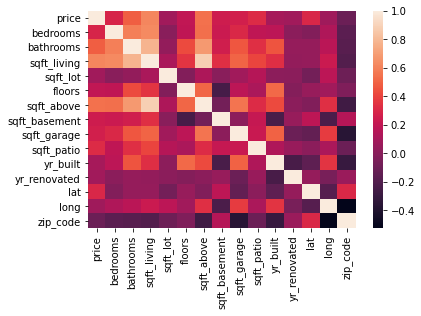

In [17]:
sns.heatmap(real_df.corr());

Exporting to CSV to conduct visual analysis on Tableau

In [14]:
real_df.to_csv('king_county_sales.csv')